In [89]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression


In [71]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [72]:
df.isna().any()

Car Model        False
Mileage          False
Sell Price($)    False
Age(yrs)         False
dtype: bool

In [73]:
cat_columns = [ cname for cname in df.columns if df[cname].dtype not in['int64', 'float64']]
cat_columns

['Car Model']

In [59]:
# cat_columns = [ df[cname] for cname in df.columns ]
# cat_columns
# what??????????

                Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5


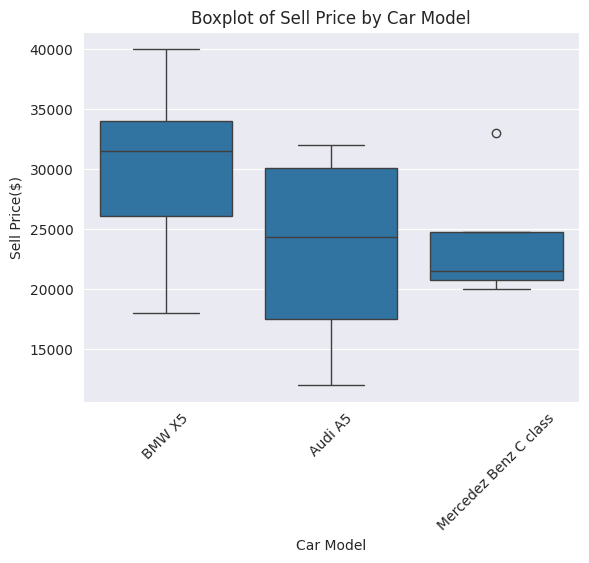

In [74]:
print(df)
sns.boxplot(x='Car Model',y='Sell Price($)', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Car Model')  # Adjust x-axis label as needed
plt.ylabel('Sell Price($)')  # Adjust y-axis label as needed
plt.title('Boxplot of Sell Price by Car Model')  # Add a title
plt.show()

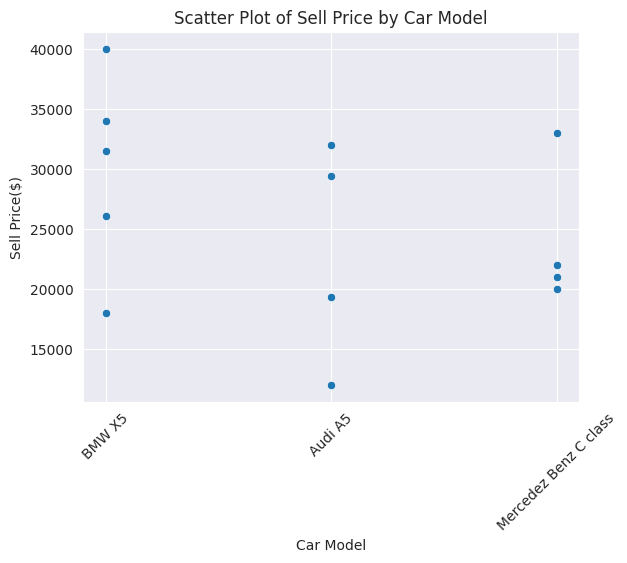

In [75]:

# Create a scatter plot to visualize the relationship between 'Car Model' and 'Sell Price($)'
sns.scatterplot(x=df['Car Model'], y=df['Sell Price($)'] )
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Car Model')  # Adjust x-axis label as needed
plt.ylabel('Sell Price($)')  # Adjust y-axis label as needed
plt.title('Scatter Plot of Sell Price by Car Model')  # Add a title
plt.show()

In [76]:
y= df['Sell Price($)']
X= df.drop('Sell Price($)',axis = 'columns',inplace=True)
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [77]:
lb = LabelEncoder()
lb_df= df.copy()
lb_df['Car Model'] = lb.fit_transform(df['Car Model'])
lb_df


,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [78]:

ohe = OneHotEncoder()
ohe_col = np.array(lb_df['Car Model']).reshape(-1,1)
ohe_col = ohe.fit_transform(ohe_col).toarray()
ohe_df =pd.DataFrame(ohe_col)
# ohe
# ohe_df.drop([2],inplace=True,axis='columns')
# ohe_df = ohe_df.rename(columns={'0': 'Bmw', '1': 'Audi'})
ohe_df
ready_to_concat_df =lb_df.drop("Car Model",axis ="columns")
final_df = pd.concat([ohe_df,ready_to_concat_df],axis=1)
final_df


,0,1,2,Mileage,Age(yrs)
0,0.0,1.0,0.0,69000,6
1,0.0,1.0,0.0,35000,3
2,0.0,1.0,0.0,57000,5
3,0.0,1.0,0.0,22500,2
4,0.0,1.0,0.0,46000,4
5,1.0,0.0,0.0,59000,5
6,1.0,0.0,0.0,52000,5
7,1.0,0.0,0.0,72000,6
8,1.0,0.0,0.0,91000,8
9,0.0,0.0,1.0,67000,6


In [ ]:
# car_model_graph= pd.concat([ohe_df,y], axis=1)
# car_model_graph
# # Create a boxplot or violin plot to visualize the relationship
# sns.boxplot(data=car_model_graph.melt(var_name='Car Model', value_name='Sell Price($)'), x='Car Model', y='Sell Price($)')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.xlabel('Car Model')  # Adjust x-axis label as needed
# plt.ylabel('Sell Price($)')  # Adjust y-axis label as needed
# plt.title('Boxplot of Sell Price by Car Model')  # Add a title
# plt.show()

      0    1    2  Mileage  Age(yrs)  Sell Price($)
0   0.0  1.0  0.0    69000         6          18000
1   0.0  1.0  0.0    35000         3          34000
2   0.0  1.0  0.0    57000         5          26100
3   0.0  1.0  0.0    22500         2          40000
4   0.0  1.0  0.0    46000         4          31500
5   1.0  0.0  0.0    59000         5          29400
6   1.0  0.0  0.0    52000         5          32000
7   1.0  0.0  0.0    72000         6          19300
8   1.0  0.0  0.0    91000         8          12000
9   0.0  0.0  1.0    67000         6          22000
10  0.0  0.0  1.0    83000         7          20000
11  0.0  0.0  1.0    79000         7          21000
12  0.0  0.0  1.0    59000         5          33000


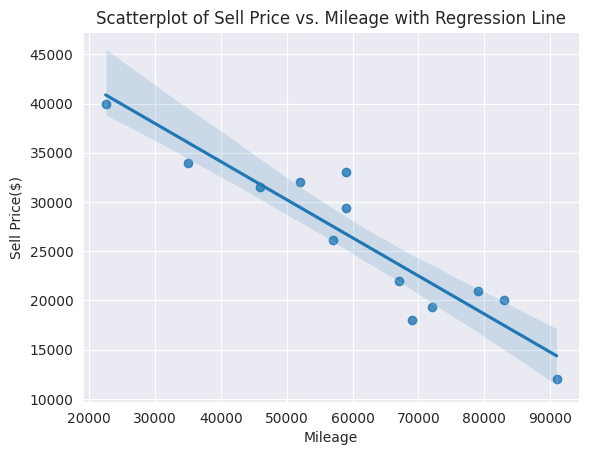

In [93]:
X= final_df
heat_map_df = pd.concat([X,y],axis=1)
print(heat_map_df)
# h= np.array(heat_map_df.loc[:,[0,1]])
# h
# Create a pairplot to visualize the relationships between the numerical features and the target variable
# sns.lmplot(x=heat_map_df['Mileage'], y =heat_map_df['Sell Price($)'], data=heat_map_df, hue =h , scatter_kws={'alpha':0.5})
# sns.lmplot(x='Age', y=heat_map_df['Sell Price($)'], data=final_df, scatter_kws={'alpha':0.5})
sns.regplot(x='Mileage', y='Sell Price($)', data=heat_map_df)
plt.title('Scatterplot of Sell Price vs. Mileage with Regression Line')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0              13 non-null     float64
 1   1              13 non-null     float64
 2   2              13 non-null     float64
 3   Mileage        13 non-null     float64
 4   Age(yrs)       13 non-null     float64
 5   Sell Price($)  13 non-null     float64
dtypes: float64(6)
memory usage: 752.0 bytes


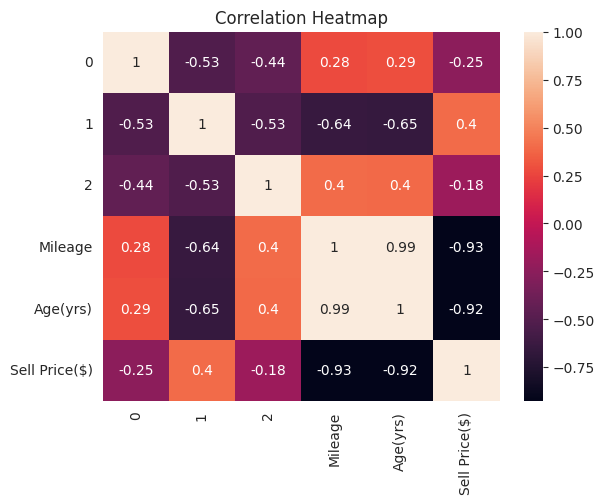

In [85]:
heat_map_df.info()
# sns.heatmap(data= heat_map_df,annot = True)
# Ensure numerical features and target variable are numeric
# heat_map_df[['Mileage', 'Age(yrs)', 'Sell Price($)']] = heat_map_df[['Mileage', 'Age(yrs)', 'Sell Price($)']].astype(float)

# Create correlation matrix
correlation_matrix = heat_map_df.corr()

# Plot heatmap
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

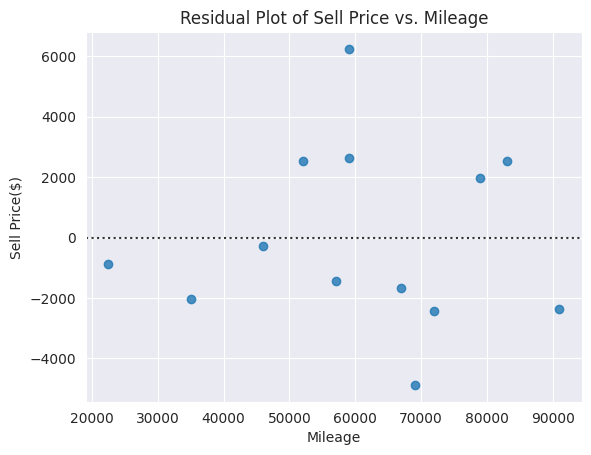

In [81]:
sns.residplot(x='Mileage', y='Sell Price($)', data=heat_map_df)
plt.title('Residual Plot of Sell Price vs. Mileage')
plt.show()

In [91]:
heat_map_df.columns = heat_map_df.columns.astype(str)
y_final= heat_map_df['Sell Price($)']
X_final = heat_map_df.drop(['Sell Price($)'],axis=1)
l_model = LinearRegression()
l_model.fit(X_final,y_final)

LinearRegression()

In [92]:
l_model.score(X_final,y_final)

0.9417050937281083

In [96]:
l_model.predict(np.array([0,0,1,45000,4]).reshape(1,-1))

/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [98]:
l_model.predict(np.array([0,1,0,86000,7]).reshape(1,-1))

/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

# Other solution:

In [ ]:
# lb = LabelEncoder()
# lb_col = df['Car Model']
# lb_col =lb.fit_transform(lb_col)
# df
# lb_col

In [ ]:
# ohe = OneHotEncoder()
# ohe_col = np.array(lb_col).reshape(-1,1)
# ohe_col = ohe.fit_transform(ohe_col).toarray()
# ohe_df = pd.DataFrame(ohe_col)
# ohe_df
# new_ohe_df = ohe_df.drop(2,axis=1)
# new_ohe_df

In [ ]:
# copy_df = df
# copy_df.drop('Car Model',axis= 1,inplace=True)
# final_df = pd.concat([new_ohe_df,copy_df],axis=1)
# final_df